# Multiple Linear Regression - Interactive Features

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Understanding How Interactive Features Affect Data

#### **Interactive** features include the linear main effects of each input and also the product of the two inputs, which serves as the interaction term.

#### The interaction feature captures how the effect on the output depends on both input variables simultaneously.

$\mu = \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + \beta_3 \times x_1 \times x_2$

$\mu$ **predicted trend**

$\beta_0$ **intercept**: value of $\mu$ when $x = 0$

$\beta_1$ **slope**: change in $\mu$ for a one-unit increase in $x_1$

$x_1$ **feature** or **input variable**: one of the independent variables used to predict $\mu$

$\beta_2$ **slope**: change in $\mu$ for a one-unit increase in $x_2$

$x_2$ **feature** or **input variable**: one of the independent variables used to predict $\mu$

$\beta_3$ **slope**: change in $\mu$ for a one-unit increase in the product $x_1 \times x_2$

#### Let's define a function that calculates the trend or average output focusing on the relationship with `x1` where we will have the interaction features which equals the product of the two inputs.

In [2]:
def calc_trend_wrt_x1_w_interactions(x1, 
                                     x2, 
                                     b0, 
                                     b1, 
                                     b2,
                                     b3):
    """
    Calculates the linear trend based on two independent variables x1 and x2, using the provided coefficients.
    
    Args:
        x1 (array-like): Values for the first independent variable.
        x2 (array-like): Values for the second independent variable.
        b0 (float): Intercept coefficient.
        b1 (float): Coefficient for x1.
        b2 (float): Coefficient for x2.
        b3 (float): Coefficient for the interaction term (x1 * x2).
    
    Returns:
        pandas.DataFrame: DataFrame containing columns for x1, x2, and the calculated trend.
    """
    res_df = pd.DataFrame({'x1': x1})
    res_df['x2'] = x2
    res_df['trend'] = b0 + \
                      b1 * \
                      res_df.x1 + \
                      b2 * \
                      res_df.x2 + \
                      b3 * \
                      res_df.x1 * \
                      res_df.x2
    return res_df

#### We need a slope defined that multiplies the interaction feature.

In [3]:
b0 = -0.25
b1 = 1.95
b2 = 0.2
b3 = 1

In [4]:
x1_values = np.linspace(-3, 
                        3, 
                        101)

In [5]:
x2_values = np.linspace(-3, 
                        3, 
                        9)

#### Let's calculate the trend with respect to `x1` for different values of `x2`.

In [6]:
study_interaction_wrt_x1_list = [calc_trend_wrt_x1_w_interactions(x1_values, x2, b0, b1, b2, b3) for x2 in x2_values]

In [7]:
len(study_interaction_wrt_x1_list)

9

In [8]:
study_interaction_wrt_x1_df = pd.concat(study_interaction_wrt_x1_list, ignore_index=True)

In [9]:
study_interaction_wrt_x1_df

,x1,x2,trend
0,-3.00,-3.0,2.300
1,-2.94,-3.0,2.237
2,-2.88,-3.0,2.174
3,-2.82,-3.0,2.111
4,-2.76,-3.0,2.048
...,...,...,...
904,2.76,3.0,14.012
905,2.82,3.0,14.309
906,2.88,3.0,14.606
907,2.94,3.0,14.903


In [10]:
study_interaction_wrt_x1_df.x2.value_counts()

x2
-3.00    101
-2.25    101
-1.50    101
-0.75    101
 0.00    101
 0.75    101
 1.50    101
 2.25    101
 3.00    101
Name: count, dtype: int64

#### Let's visualize the average output or trend with respect to `x1` for each `x2` unique value.

#### We still have 9 unique values of `x2` however the slopes are not shifting up or down as we now have different slopes.

#### When `x2` is -3, the trend or average output is decreasing for a 1 unit change of input 1 and when `x2` is 3, the trend or average output is increasing for a 1 unit change of input 1.


In [11]:
b1

1.95

#### We know $\beta_1$ is > 0, positive, and yet we have a negative slope, however, when `x2` is 3 we have a positive slope.

#### The change when `x2` is 3, it is greater than $beta_1$.

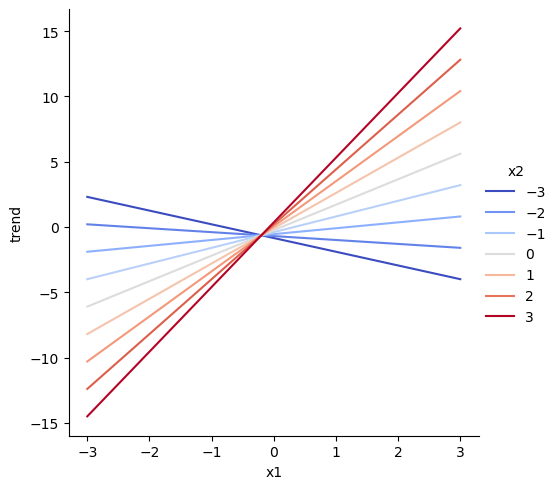

In [12]:
sns.relplot(data=study_interaction_wrt_x1_df,
            x='x1',
            y='trend',
            hue='x2',
            kind='line',
            palette='coolwarm',
            estimator=None,
            units='x2')
plt.show()

#### An interaction represents that the relationship with respect to 1 input depends on the other input and the same idea holds for the relationship with respect to `x2`.

In [13]:
def calc_trend_wrt_x2_w_interactions(x1, 
                                     x2, 
                                     b0, 
                                     b1, 
                                     b2,
                                     b3):
    """
    Calculates the linear trend based on two independent variables x1 and x2, using the provided coefficients.
    
    Args:
        x1 (array-like): Values for the first independent variable.
        x2 (array-like): Values for the second independent variable.
        b0 (float): Intercept coefficient.
        b1 (float): Coefficient for x1.
        b2 (float): Coefficient for x2.
        b3 (float): Coefficient for the interaction term (x1 * x2).
    
    Returns:
        pandas.DataFrame: DataFrame containing columns for x1, x2, and the calculated trend.
    """
    res_df = pd.DataFrame({'x2': x2})
    res_df['x1'] = x1
    res_df['trend'] = b0 + \
                      b1 * \
                      res_df.x1 + \
                      b2 * \
                      res_df.x2 + \
                      b3 * \
                      res_df.x1 * \
                      res_df.x2
    return res_df

In [14]:
x2_values_b = np.linspace(-3, 3, 101)

In [15]:
x1_values_b = np.linspace(-3, 3, 9)

In [16]:
study_interaction_wrt_x2_list = [calc_trend_wrt_x2_w_interactions(x1, x2_values_b, b0, b1, b2, b3) for x1 in x1_values_b]

In [17]:
study_interaction_wrt_x2_df = pd.concat(study_interaction_wrt_x2_list, ignore_index=True)

#### Here we see $\beta_2 < \beta_1$ as the magnitude and sign depend on the value of `x1`.

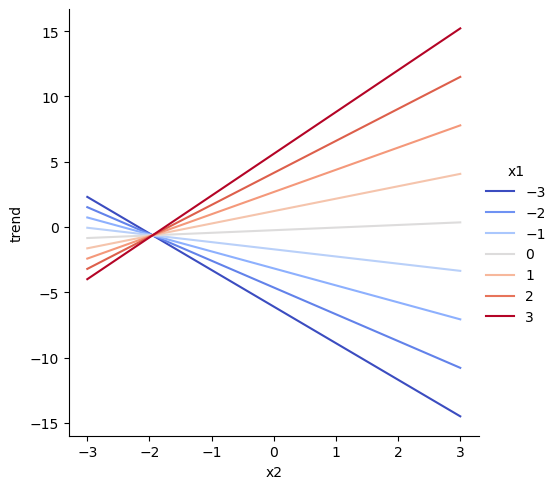

In [18]:
sns.relplot(data=study_interaction_wrt_x2_df,
            x='x2',
            y='trend',
            hue='x1',
            kind='line',
            palette='coolwarm',
            estimator=None,
            units='x1')
plt.show()

### **THE RELATIONSHIP OF THE AVERAGE OUTPUT WITH RESPECT TO 1 INPUT DEPENDS ON THE OTHER INPUT AND ROTATES THE LINE BY CHANGING THE SLOPE.**

#### Interactions provide a lot of flexibility and allow the inputs to effect the behavior of other inputs.